In [2]:
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# path = 'gdrive/MyDrive/Classes/Physics 191/A-5 Compton/Compton Data/'
path = ''

In [4]:
# ls 'gdrive/MyDrive/Classes/Physics 191/A-5 Compton/Compton Data/Calibrations'
%matplotlib inline

### NaI Detector

In [5]:
cobalt_cal = np.loadtxt(path + 'Calibrations/CobaltCalibration16gain610volts120sec.Spe',skiprows=12, max_rows=1023)
cesium_cal = np.loadtxt(path + 'Calibrations/CesiumCalibration40gain610volts120sec.Spe',skiprows=12, max_rows=1023)
barium_cal = np.loadtxt(path +'Calibrations/BariumCalibration40gain610volts120sec.Spe',skiprows=12, max_rows=1023)
americium_cal = np.loadtxt(path +'Calibrations/AmericiumCalibration40gain610volts120sec.Spe',skiprows=12, max_rows=1023)
sodium_cal = np.loadtxt(path +'Calibrations/SodiumCalibration16gain610volts120sec.Spe',skiprows=12, max_rows=1023)
background =np.loadtxt(path +'Calibrations/BackgroundRadiation40gain610volts120sec.Spe',skiprows=12, max_rows=1023)

In [6]:
cobalt_cal_new = np.loadtxt(path + 'Calibrations/CobaltCalibrationUnknownGain610volts120sec.Spe',skiprows=12, max_rows=1023)
cesium_cal_new = np.loadtxt(path + 'Calibrations/CesiumCalibrationUnknownGain610volts120sec.Spe',skiprows=12, max_rows=1023)
barium_cal_new = np.loadtxt(path +'Calibrations/BariumCalibrationUnknownGain610volts120sec.Spe',skiprows=12, max_rows=1023)
americium_cal_new = np.loadtxt(path +'Calibrations/AmericiumCalibrationUnknownGain610volts120sec.Spe',skiprows=12, max_rows=1023)
sodium_cal_new = np.loadtxt(path +'Calibrations/SodiumCalibrationUnknownGain610volts120sec.Spe',skiprows=12, max_rows=1023)


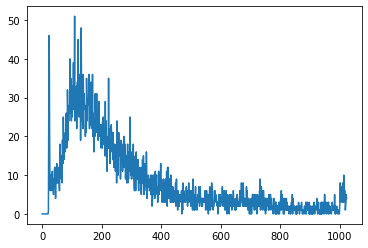

In [7]:
plt.plot(background)

## Fitting Gaussians

In [8]:
from scipy.optimize import curve_fit

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt


In [9]:
def gauss_fit_to_data(input_data,x1,x2,energy_peak,scale=1):
    xdata = np.linspace(1,1023,1023)[x1:x2]
    ydata = input_data[x1:x2]

    H, A, x0, sigma = gauss_fit(xdata, ydata)
    # offset, amplitude, center, sigma

    plt.plot(xdata, ydata, label='data')
    plt.plot(xdata, gauss(xdata, H, A, x0, sigma), '--r', label='fit')

    plt.legend()
    plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
    plt.xlabel('X position')
    plt.ylabel('Intensity (A)')
    plt.show()
    print(np.array([x0*scale, energy_peak]))
    return np.array([x0*scale, energy_peak])

In [10]:
cal = []
cal_new = []

### Cobalt-60
16 gain 610 V 120 sec

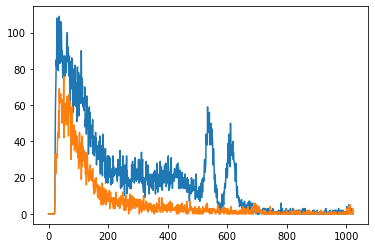

In [11]:
plt.plot(cobalt_cal)
plt.plot(cobalt_cal_new)

#### 1332 KeV Peak

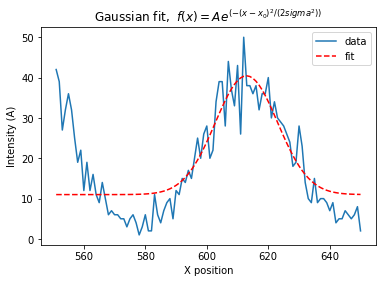

[1532.25924912 1332.        ]


In [12]:
x1 = 550
x2 = 650
cal.append(gauss_fit_to_data(cobalt_cal,x1,x2,1332,2.5))
# cal_new.append(gauss_fit_to_data(cobalt_cal_new,x1,x2,1332,2.5))


#### 1173 keV Peak

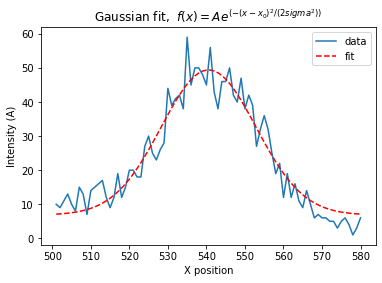

[1351.40555607 1173.        ]


In [13]:
x1 = 500
x2 = 580
cal.append(gauss_fit_to_data(cobalt_cal,x1,x2,1173,2.5))

### Sodium-22

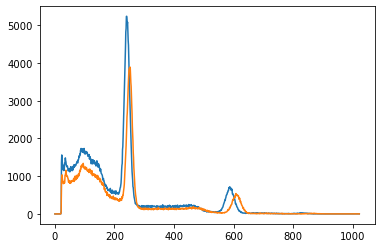

In [14]:
plt.plot(sodium_cal)
plt.plot(sodium_cal_new)

#### 1274 keV Peak

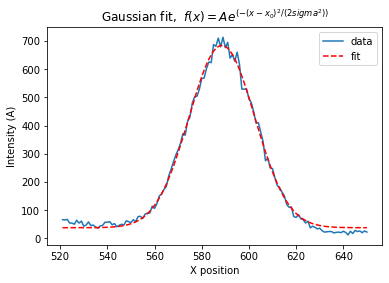

[1471.36049932 1274.        ]


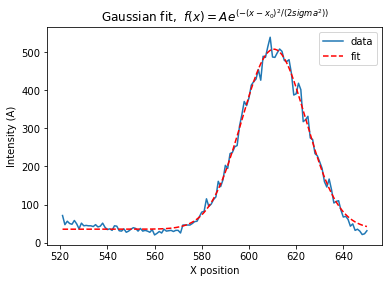

[1526.4613706 1274.       ]


In [15]:
x1 = 520
x2 = 650
cal.append(gauss_fit_to_data(sodium_cal,x1,x2,1274,2.5))
cal_new.append(gauss_fit_to_data(sodium_cal_new,x1,x2,1274,2.5))

#### 511 keV Peak

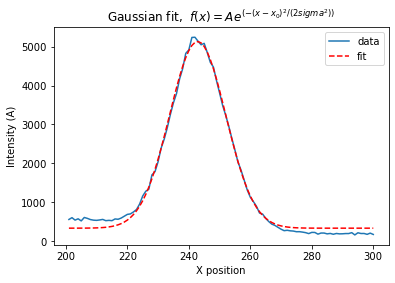

[607.20227685 511.        ]


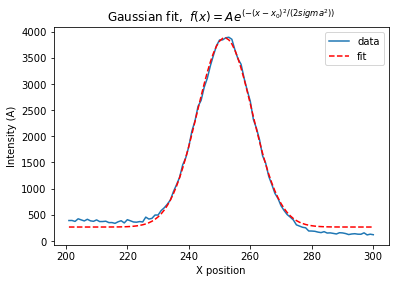

[629.22463208 511.        ]


In [16]:
x1 = 200
x2 = 300
cal.append(gauss_fit_to_data(sodium_cal,x1,x2,511,2.5))
cal_new.append(gauss_fit_to_data(sodium_cal_new,x1,x2,511,2.5))

### Cesium-137
40 gain 610 V 120 sec

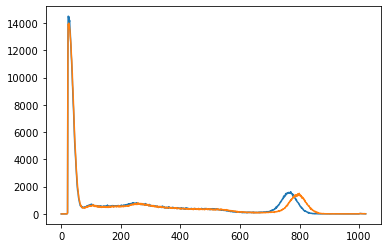

In [17]:
plt.plot(cesium_cal)
plt.plot(cesium_cal_new)

#### 662 KeV Peak

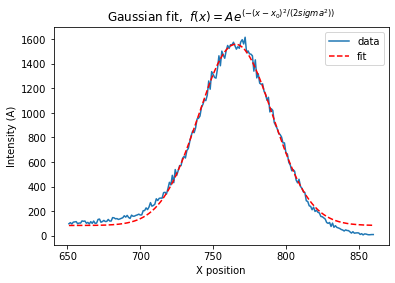

[765.44151391 662.        ]


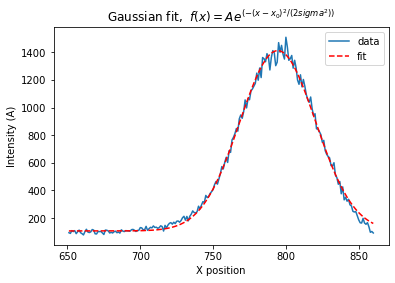

[794.40056326 662.        ]


In [18]:
x1 = 650
x2 = 860
cal.append(gauss_fit_to_data(cesium_cal,x1,x2,662))
cal_new.append(gauss_fit_to_data(cesium_cal_new,x1,x2,662))

### Barium-133
40 gain 610 V 120 sec

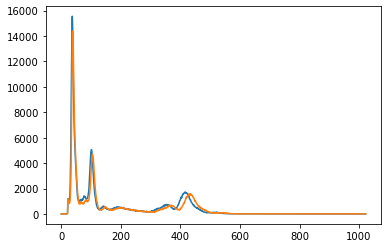

In [19]:
plt.plot(barium_cal)
plt.plot(barium_cal_new)

#### 356 keV Peak

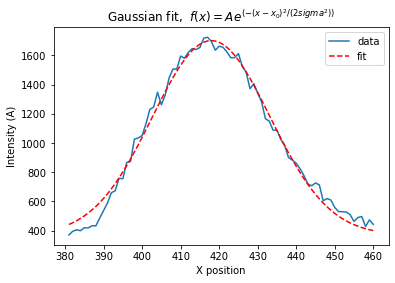

[417.94471643 356.        ]


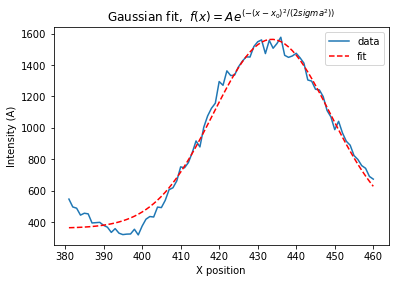

[433.65282908 356.        ]


In [20]:
x1 = 380
x2 = 460
cal.append(gauss_fit_to_data(barium_cal,x1,x2,356))
cal_new.append(gauss_fit_to_data(barium_cal_new,x1,x2,356))

#### 81.0 keV

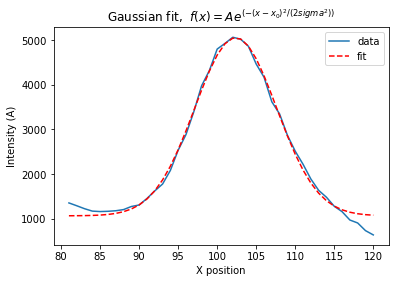

[102.37029207  81.        ]


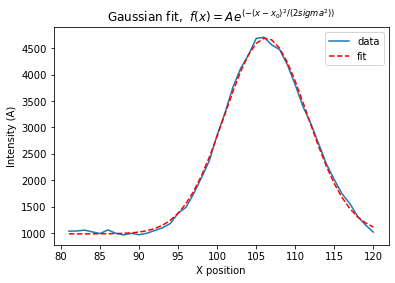

[106.25401678  81.        ]


In [21]:
x1 = 80
x2 = 120
cal.append(gauss_fit_to_data(barium_cal,x1,x2,81))
cal_new.append(gauss_fit_to_data(barium_cal_new,x1,x2,81))

### Americium

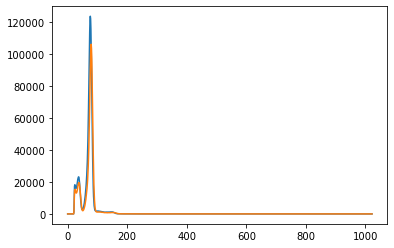

In [22]:
plt.plot(americium_cal)
plt.plot(americium_cal_new)

#### 59.5 KeV

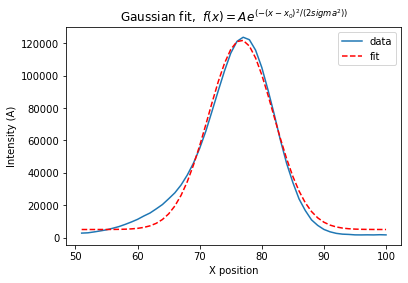

[76.66817885 59.5       ]


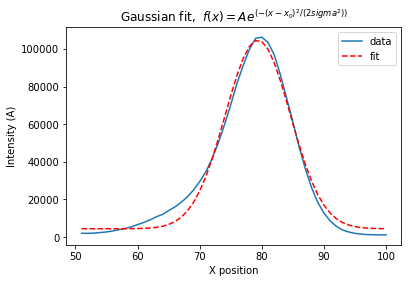

[79.36093025 59.5       ]


In [23]:
x1 = 50
x2 = 100
cal.append(gauss_fit_to_data(americium_cal,x1,x2,59.5))
cal_new.append(gauss_fit_to_data(americium_cal_new,x1,x2,59.5))

In [24]:
%matplotlib qt
plt.rcParams.update({'font.size': 30})
plt.rcParams["font.family"] = "serif"

In [25]:
energies = np.array(cal).T[1]
positions = np.array(cal).T[0]
energies_new = np.array(cal_new).T[1]
positions_new = np.array(cal_new).T[0]

In [26]:
[m,b],pcov = np.polyfit(positions, energies, 1, full=False, cov=True)
merr, berr = np.sqrt(np.diag(pcov))
m_new,b_new = np.polyfit(positions_new, energies_new, 1)
x = np.linspace(1,1600,1600)
plt.figure(figsize=(15,10))
plt.plot(positions, energies,'bo',markersize=15,label = f'Measured 9/9/2021: Energy = {round(m,4)} $\cdot$ Bin {round(b,4)}')
plt.plot(positions_new, energies_new,'go',markersize=15,label = f'Measured 9/30/2021: Energy = {round(m_new,4)} $\cdot$ Bin {round(b_new,4)}')
plt.plot(x, m*x+b,'b--')
plt.plot(x,m_new*x+b_new,'g--')
plt.xlabel('MAESTRO Bin')
plt.ylabel('Energies (keV)')
plt.title('NaI Detector Calibration')
plt.legend(prop={'size': 20})

In [27]:
m

0.8741586926259174

In [28]:
b

-10.031221336877309

In [29]:
m_new

0.8398160567649129

In [30]:
b_new

-9.016848123325229

### Ge Detector

In [31]:
americium_ge =np.loadtxt(path +'Calibrations/AmericiumCalibrationGe85gain1500volts840sec.Spe',skiprows=12, max_rows=1023)
background_ge =np.loadtxt(path +'Calibrations/BackgroundRadiationGe85gain1500volts840sec.Spe',skiprows=12, max_rows=1023)

In [32]:
%matplotlib qt

plt.plot(americium_ge-background_ge)

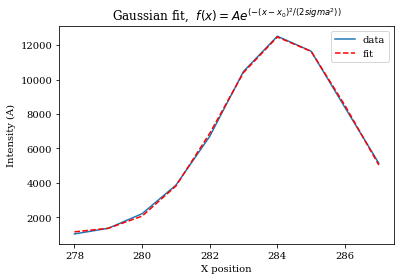

[284.22416558  17.6       ]


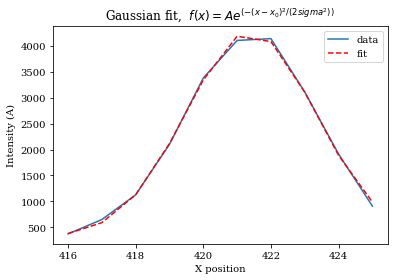

[421.40139054  26.3       ]


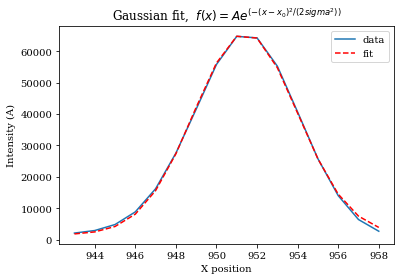

[951.44026528  59.5       ]


In [33]:
%matplotlib inline
ge_cal = []
ge_cal.append(gauss_fit_to_data(americium_ge,277,287,17.6))
ge_cal.append(gauss_fit_to_data(americium_ge,415,425,26.3))
ge_cal.append(gauss_fit_to_data(americium_ge,942,958,59.5))

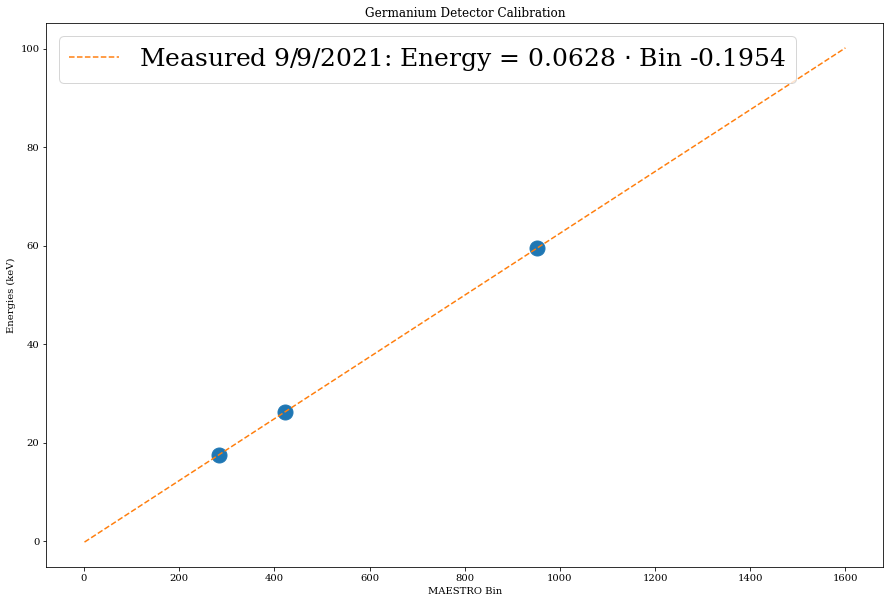

In [34]:
plt.figure(figsize=(15,10))
energies_ge = np.array(ge_cal).T[1]
positions_ge = np.array(ge_cal).T[0]
m_ge,b_ge = np.polyfit(positions_ge, energies_ge, 1)
x = np.linspace(1,1600,100)
plt.plot(positions_ge, energies_ge,'o', markersize=15)
plt.plot(x, m_ge*x+b_ge,'--', label = f'Measured 9/9/2021: Energy = {round(m_ge,4)} $\cdot$ Bin {round(b_ge,4)}')
plt.xlabel('MAESTRO Bin')
plt.ylabel('Energies (keV)')
plt.title('Germanium Detector Calibration')
plt.legend(prop={'size': 25})

In [35]:
m_ge,b_ge

(0.06275314836002215, -0.19536577738645092)